In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
import mglearn
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

/home/messq/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/messq/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
df=pd.read_csv('winequality-red.csv')
z = np.abs(stats.zscore(df))
threshold = 4 # 3 odchylenia standardowe
df = df[(z<threshold).all(axis=1)]
y=df['quality'].values
x=df.iloc[:,:11]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [3]:
classifier = DecisionTreeClassifier(min_samples_leaf=1,min_samples_split=2,splitter='random',random_state=11)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print('accuracy train: '+str(classifier.score(x_train,y_train)))
print('accuracy test: '+str(accuracy_score(y_test,y_pred)))
print('cv: '+str(np.mean(cross_val_score(classifier,x_train, y_train, cv=5,n_jobs=-1))))

accuracy train: 1.0
accuracy test: 0.6201298701298701
cv: 0.6135092085614733


In [4]:
classifier=xgb.XGBClassifier(booster="gbtree",learning_rate=0.5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print('accuracy train: '+str(classifier.score(x_train,y_train)))
print('accuracy test: '+str(accuracy_score(y_test,y_pred)))
print('cv: '+str(np.mean(cross_val_score(classifier,x_train, y_train, cv=5,n_jobs=-1))))

accuracy train: 0.9918633034987795
accuracy test: 0.6493506493506493
cv: 0.6428007300481168


In [5]:
classifier = RandomForestClassifier(random_state=82)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print('accuracy train: '+str(classifier.score(x_train,y_train)))
print('accuracy test: '+str(accuracy_score(y_test,y_pred)))
print('cv: '+str(np.mean(cross_val_score(classifier,x_train, y_train, cv=5,n_jobs=-1))))

accuracy train: 1.0
accuracy test: 0.6623376623376623
cv: 0.6891720590675294


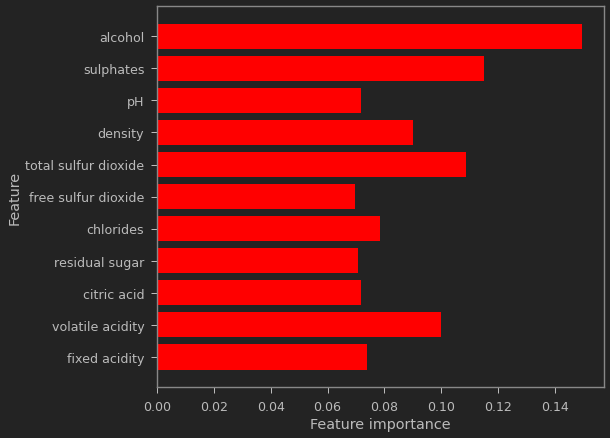

In [6]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center',color='red')
    plt.yticks(np.arange(n_features), df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(classifier)